# Ejercicio: Análisis de horas de uso de redes sociales

Un grupo de estudiantes registró durante 30 días la **cantidad de horas que pasaron usando redes sociales**.
Los datos están representados en una **Serie de Pandas**, donde cada índice corresponde al día (`Día 1`, `Día 2`, ..., `Día 30`).

Su tarea será **analizar esta Serie** aplicando operaciones estadísticas y visualizaciones para entender mejor los hábitos de uso.

---

## Instrucciones

1. **Crear la Serie**

   * Genera una lista de 30 valores (pueden ser aleatorios o inventados entre 0 y 10 horas).
   * Convierte la lista en una Serie de Pandas.
   * Usa como índice `Día 1`, `Día 2`, ..., `Día 30`.

2. **Exploración de la Serie**

   * Muestra los primeros y últimos 5 valores.
   * Consulta el valor de un día específico (por ejemplo, `"Día 7"`).
   * Verifica la longitud, el tipo de datos y si existen valores faltantes.

3. **Estadísticas básicas**

   * Calcula: promedio, mediana, mínimo, máximo, varianza y desviación estándar.
   * Identifica los días con mayor y menor uso de redes sociales.

4. **Filtrado y condiciones**

   * Filtra los días donde se usaron **más de 6 horas**.
   * Cuenta cuántos días el uso fue **menor a 2 horas**.


5. **Visualizaciones**

   * Realiza al menos **2 gráficos diferentes** para representar la información.
   * Puedes elegir entre:

     * Gráfico de línea para ver la evolución diaria.
     * Histograma para la distribución de horas.
     * Gráfico de barras para comparar ciertos días.
   * ¡Se creativo! Elige los gráficos que mejor expliquen los resultados.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class UsoRedesSociales:

    # Constructor de la clase
    # Tiene como parametros el numero de dias, hora minima, hora maxima y el seed que permite hacer
    """
    Definición y uso
    El seed()método se utiliza para inicializar el generador de números aleatorios.

    El generador de números aleatorios necesita un número con el cual comenzar (un valor semilla)
    para poder generar un número aleatorio.

    """

    # Ademas el constructor ocupa varios datos adicionales que se almacenaran una vez ya se tenga
    # Generados los datos los cuales son los datos de las horas y las series con indice Dia


    def __init__(self, num_dias=30, hora_min=0, hora_max=10, seed=42):
        self.num_dias = num_dias
        self.hora_min = hora_min
        self.hora_max = hora_max
        self.seed = seed
        self.datos = None
        self.series = None


    # Esta funcion permite genera datos aleatorios usando una semilla y una funcion de numpy
    # Permite generar datos en un rango de 30 dias

    def generar_datos(self):

        # 1 Generar la semilla de reproducibilidad
        np.random.seed(self.seed)
        # 2 Inicializar la lista que vamos a usar
        self.datos = []
        # 3 Generar un bucle for con la cantidad de dias en estado caso 30
        for _ in range(self.num_dias):
            # 4 Genera las horas x dia
            horas_dia = np.random.uniform(self.hora_min, self.hora_max)
            # 5 Guardar en la lista las horas x dia
            self.datos.append(horas_dia)

    # Esta funcion permite convertir los datos en una serie de pandas con Dias como indice
    def crear_serie(self):
        self.generar_datos()
        indices = [f"Dia {i+1}" for i in range (self.num_dias)]
        self.series = pd.Series(self.datos, index=indices)
        return self.series

redes = UsoRedesSociales()
series = redes.crear_serie()
print(series)

Dia 1     3.745401
Dia 2     9.507143
Dia 3     7.319939
Dia 4     5.986585
Dia 5     1.560186
Dia 6     1.559945
Dia 7     0.580836
Dia 8     8.661761
Dia 9     6.011150
Dia 10    7.080726
Dia 11    0.205845
Dia 12    9.699099
Dia 13    8.324426
Dia 14    2.123391
Dia 15    1.818250
Dia 16    1.834045
Dia 17    3.042422
Dia 18    5.247564
Dia 19    4.319450
Dia 20    2.912291
Dia 21    6.118529
Dia 22    1.394939
Dia 23    2.921446
Dia 24    3.663618
Dia 25    4.560700
Dia 26    7.851760
Dia 27    1.996738
Dia 28    5.142344
Dia 29    5.924146
Dia 30    0.464504
dtype: float64


In [ ]:
#Mostrar los valores
print("\n" + "="*50)
print("PRIMEROS 5 DIAS")
print("="*50)
print(series.head())

print("\n" + "="*50)
print("ULTIMOS 5 DIAS")
print("="*50)
print(series.tail())

print("\n" + "="*50)
print("MOSTRAR EL USO DE REDES EN UN DIA EN ESPECIFICO")
print("="*50)
dia_elegido = "Dia 7"
print(f"El {dia_elegido} tiene un uso de redes sociales de: {series.loc[dia_elegido]:.2f} Horas")

print("\n" + "="*50)
print("VERIFICAR LA  LONGITUD")
print("="*50)

if len(series) == 30:
    print("Si esta completa la serie")
else:
    print("No se encuentra completa la serie")

print("\n" + "="*50)
print("TIPO DE DATO DE LA SERIE")
print("="*50)
print(f"Su series es de tipo {series.dtype}")

print("\n" + "="*50)
print("VALORES FALTANTES")
print("="*50)
print(f"Faltan {series.isnull().sum()} valores")


PRIMEROS 5 DIAS
Dia 1    3.745401
Dia 2    9.507143
Dia 3    7.319939
Dia 4    5.986585
Dia 5    1.560186
dtype: float64

ULTIMOS 5 DIAS
Dia 26    7.851760
Dia 27    1.996738
Dia 28    5.142344
Dia 29    5.924146
Dia 30    0.464504
dtype: float64

MOSTRAR EL USO DE REDES EN UN DIA EN ESPECIFICO
El Dia 7 tiene un uso de redes sociales de: 0.58 Horas

VERIFICAR LA  LONGITUD
Si esta completa la serie

TIPO DE DATO DE LA SERIE
Su series es de tipo float64

VALORES FALTANTES
Faltan 0 valores


In [ ]:
# Estadísticas básicas
def get_statistics():

  stats = {
        "Promedio": f"{series.mean():.2f}",
        "Mediana": f"{series.median():.2f}",
        "Mínimo": f"{series.min():.2f}",
        "Máximo": f"{series.max():.2f}",
        "Varianza": f"{series.var():.2f}",
        "Desviación estándar": f"{series.std():.2f}",
        "Día con mayor uso": series.idxmax(),
        "Día con menor uso": series.idxmin()
    }
  return stats

estadisticas = get_statistics()
print("Estadísticas Básicas:\n")
for clave, valor in estadisticas.items():
  print(f"{clave}: {valor}")



Estadísticas Básicas:

Promedio: 4.39
Mediana: 4.03
Mínimo: 0.21
Máximo: 9.70
Varianza: 7.98
Desviación estándar: 2.82
Día con mayor uso: Dia 12
Día con menor uso: Dia 11


In [ ]:
def filtrar(condicion=True):
  #Es True para ir a la primera condicion y False cuando se necesitan los dias
  if condicion:
    print("\n"+"="*55)
    print("\tDias con más de 6 horas de uso")
    print("="*55)
    print(series[series >= 6 ]) #Funcion de las series para poder filtrar los datos sin un for
  else:
    count = 0
    print("\n" + "="*55)
    print("\tDias con menos de 2 horas de uso")
    print("="*55)
    print(series[series <=2]) #Muestra los dias
    print(f"\nEl numero total de dias con menos de 2 horas de uso son: {len(series[series <=2])}") #Cuenta cuantos existen con el metodo len()


filtrar()
filtrar(False)


	Dias con más de 6 horas de uso
Dia 2     9.507143
Dia 3     7.319939
Dia 8     8.661761
Dia 9     6.011150
Dia 10    7.080726
Dia 12    9.699099
Dia 13    8.324426
Dia 21    6.118529
Dia 26    7.851760
dtype: float64

	Dias con menos de 2 horas de uso
Dia 5     1.560186
Dia 6     1.559945
Dia 7     0.580836
Dia 11    0.205845
Dia 15    1.818250
Dia 16    1.834045
Dia 22    1.394939
Dia 27    1.996738
Dia 30    0.464504
dtype: float64

El numero total de dias con menos de 2 horas de uso son: 9


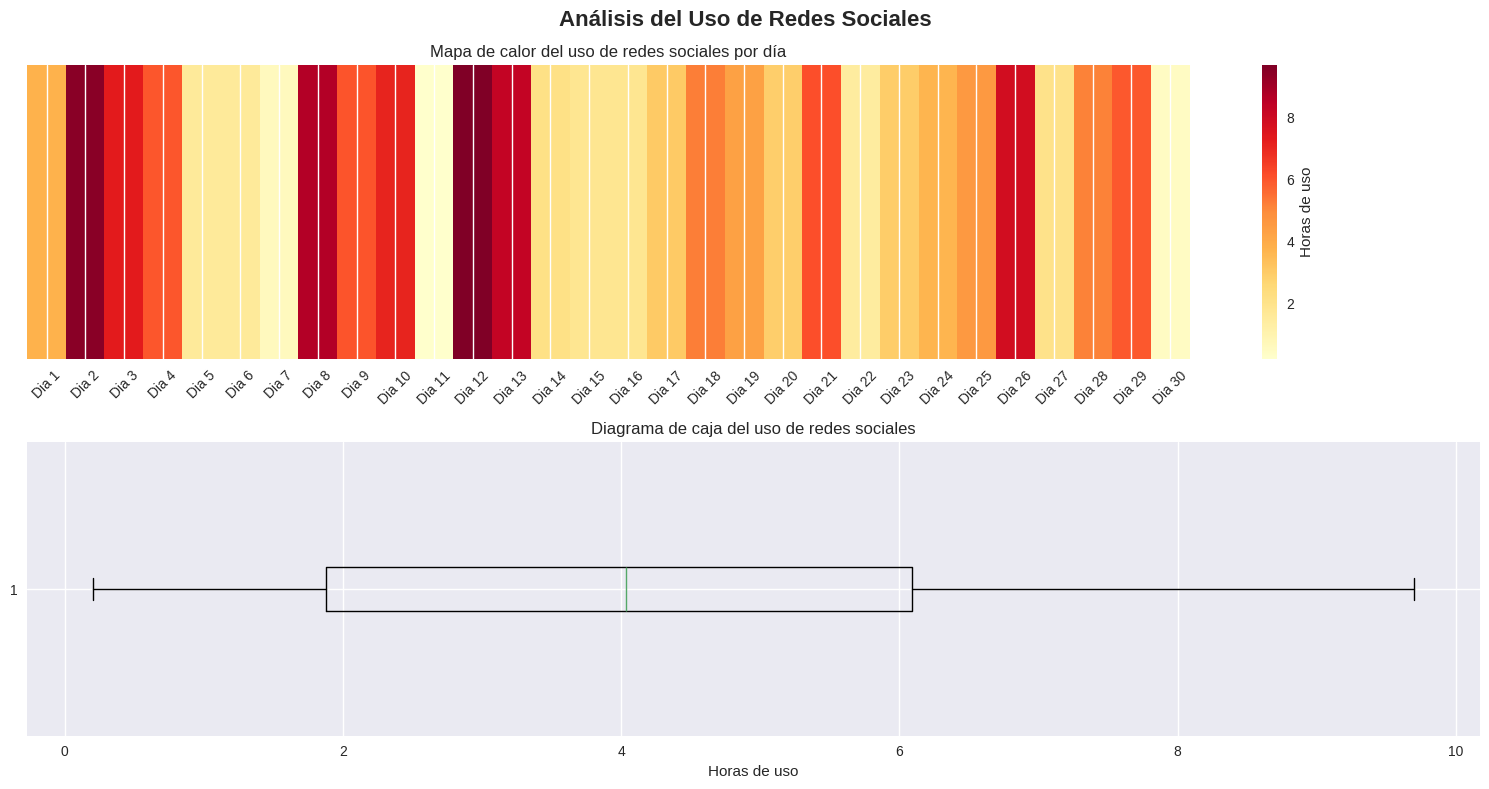

In [ ]:
# Estilo de los gráficos
plt.style.use("seaborn-v0_8")# Mantener el estilo que ya usas

# Crear figura
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))
fig.suptitle("Análisis del Uso de Redes Sociales", fontsize=16, fontweight='bold')

# Gráfico 1: Mapa de calor del uso de redes sociales
im = ax1.imshow(series.values.reshape(1, -1), cmap="YlOrRd", aspect="auto")
ax1.set_xticks(range(len(series)))
ax1.set_xticklabels(series.index, rotation=45)
ax1.set_yticks([])  # ocultar eje y
ax1.set_title("Mapa de calor del uso de redes sociales por día")
cbar = fig.colorbar(im, ax=ax1, orientation="vertical")
cbar.set_label("Horas de uso")

# Gráfico 2: Diagrama de caja
ax2.boxplot(series.values, vert=False)
ax2.set_title("Diagrama de caja del uso de redes sociales")
ax2.set_xlabel("Horas de uso")

# Ajustar layout y mostrar gráficos
plt.tight_layout(rect=[0, 0, 1, 1])  # dejar espacio para el título
plt.show()
